In [0]:
%pip install -r ./requirements.txt

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
from llama_parse import LlamaParse

from llama_index.embeddings.fastembed import FastEmbedEmbedding
from llama_index.core import Settings

from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.llms.groq import Groq

from llama_index.core import Settings
from llama_index.core.callbacks import CallbackManager
from langfuse.llama_index import LlamaIndexCallbackHandler

import qdrant_client
import nest_asyncio
import pickle
import os

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
Unexpected internal error when monkey patching `PreTrainedModel.from_pretrained`: 
PreTrainedModel requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.

Unexpected internal error when monkey patching `Trainer.train`: 
Trainer requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.

Unexpected internal error when disabling torch.jit: No module named 'torch'


In [0]:
# Tokens used, as it was not possible to pass it through env vars in Serverless clusters:

llamaparse_api_key = ""

qdrant_url = "https://66a13f9e-d7ff-45bd-a5f6-6ccb79d685be.us-east4-0.gcp.cloud.qdrant.io"
qdrant_api_key = ""

groq_api_key = ""

langfuse_secret_key = ""
langfuse_public_key = ""

In [0]:
# Setting up the traceability for the LLM.
 
langfuse_callback_handler = LlamaIndexCallbackHandler(
    secret_key=langfuse_secret_key,
  public_key=langfuse_public_key,
  host="https://cloud.langfuse.com"
)
Settings.callback_manager = CallbackManager([langfuse_callback_handler])

nest_asyncio.apply()

In [0]:


def load_or_parse_data(location):
    data_file = "./parsed_data_kone_sustainability_report.pkl"
    
    if os.path.exists(data_file):
        # Load the parsed data from the file
        with open(data_file, "rb") as f:
            parsed_data = pickle.load(f)
    else:

        parsingInstruction = """This is a sustainability report. The report contains texts, images and tables."""
        llama_parse_documents = LlamaParse(api_key=llamaparse_api_key, result_type="markdown", parsing_instruction=parsingInstruction).load_data(location)

        # Save the parsed data to a file
        with open(data_file, "wb") as f:
            pickle.dump(llama_parse_documents, f)
        
        # Set the parsed data to the variable
        parsed_data = llama_parse_documents
    
    return parsed_data

# Call the function to either load or parse the data
path = "/Workspace/Shared/Hackathon_gen_ai/klm_reports/raw_datasets/kone_sustainability_report.pdf"
llama_parse_documents = load_or_parse_data(path)

In [0]:
######### Set up FastEmbedEmbeddings #############

# by default llamaindex uses OpenAI models, but we are using BAAI/bge-base-en-v1.5 instead for embedding.
embed_model = FastEmbedEmbedding(model_name="BAAI/bge-base-en-v1.5", cache_dir="./fastembed_cache")

Settings.embed_model = embed_model

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [0]:

#### CREATING VECTOR STORE #####

client = qdrant_client.QdrantClient(api_key=qdrant_api_key, url=qdrant_url,)

vector_store = QdrantVectorStore(client=client, collection_name='genai-databricks-hackathon_sustainability_report_kone')
storage_context = StorageContext.from_defaults(vector_store=vector_store)
index = VectorStoreIndex.from_documents(documents=llama_parse_documents, storage_context=storage_context, show_progress=True)


Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/47 [00:00<?, ?it/s]

In [0]:
######### Setting up the Groq API that will interact with the person ###########

llm = Groq(model="mixtral-8x7b-32768", api_key=groq_api_key)

#### Setting llm other than openAI ( by default used openAI's model)
Settings.llm = llm

# create a query engine for the index
query_engine = index.as_query_engine()

In [0]:


# query the engine
query = "From which year is the sustainability report ?"
response = query_engine.query(query)
print(response)

The sustainability report is from the year 2023.


In [0]:
# query the engine
query = "what are the Material content of KONE MonoSpace® 700 DX elevator?"
response = query_engine.query(query)
print(response)

The material content of the KONE MonoSpace® 700 DX elevator consists of organic materials, specifically plywood, which accounts for 1% of the total material. Other materials such as lubricants and glues also make up 1% of the total. The remaining 98% of the material content is not specified in the context provided.


In [0]:
# query the engine
#query = "what is the common stock balance as of Balance as of March 31, 2022?"
query = "what is the Number of products covered by Environmental Product Declarations os of 2023"
response = query_engine.query(query)
print(response)

The number of products covered by Environmental Product Declarations in 2023 is not explicitly stated in the provided context. However, it is mentioned that KONE has made an announcement regarding Environmental Product Declarations with a target of a 40% reduction in product-related carbon footprint from materials and lifetime energy use (Scope 3) relative to products ordered by 2030, from a 2018 baseline.


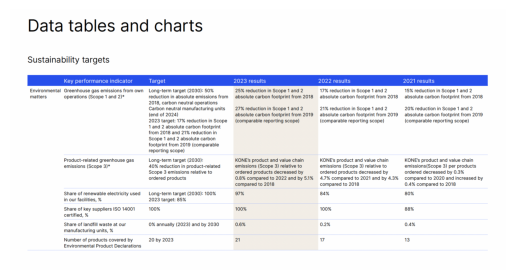

In [0]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to the image file
image_path = "/Workspace/Shared/Hackathon_gen_ai/images/answer3.png"

# Read the image using matplotlib
image = mpimg.imread(image_path)

# Display the image in the notebook
plt.imshow(image)
plt.axis('off')
plt.show()

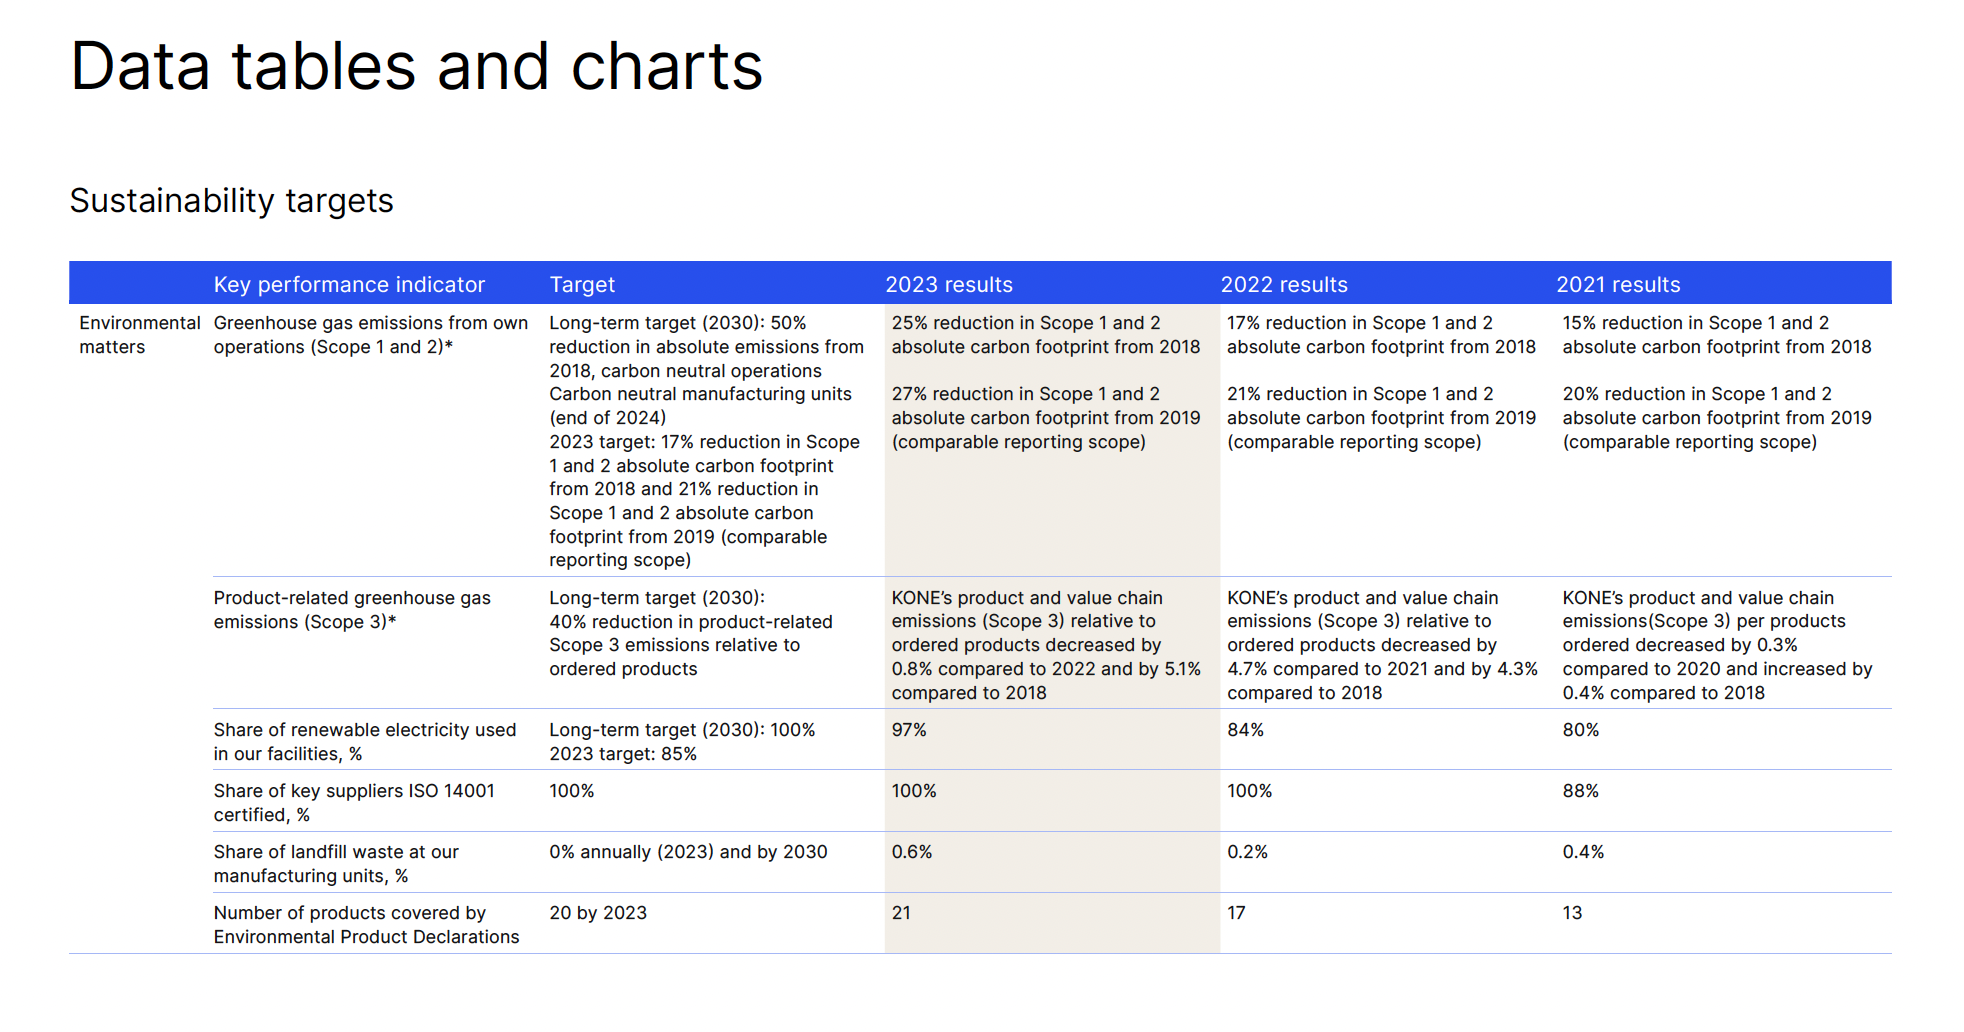

In [0]:
from IPython.display import Image, display

# Specify the path to the image file
image_path = "/Workspace/Shared/Hackathon_gen_ai/images/answer3.png"

# Display the image in the notebook
display(Image(filename=image_path))